In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import ReLU, LeakyReLU


In [ ]:
df=pd.read_csv('/content/sample_data/Churn Modeling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
class_counts = df['Exited'].value_counts()
print(class_counts)

Exited
0    7963
1    2037
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

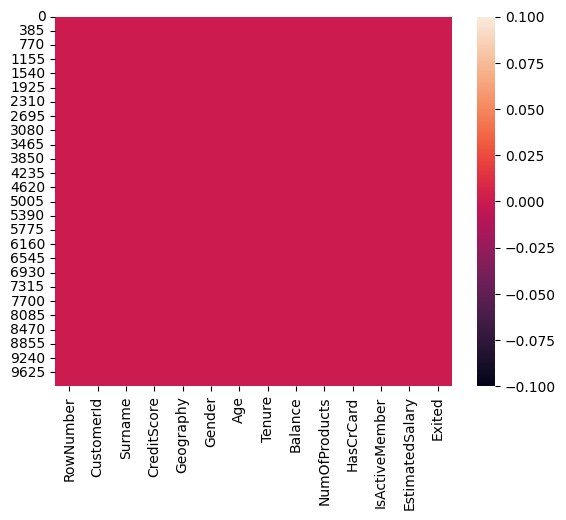

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
5,1
6,0
7,1
8,0
9,0


In [ ]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
geography=geography.astype(int)
gender=gender.astype(int)

In [ ]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
clf=Sequential()

In [ ]:
clf.add(Dense(units=11,activation='relu'))

In [ ]:
clf.add(Dense(units=7,activation='relu'))
clf.add(Dropout(0.2))

In [ ]:
clf.add(Dense(units=6,activation='relu'))
clf.add(Dropout(0.3))

In [ ]:
clf.add(Dense(units=1,activation='sigmoid'))

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
clf.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#early stop
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=20,verbose=1,mode="auto",baseline=None, restore_best_weights=False)

In [ ]:
model_history=clf.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8012 - loss: 0.4873 - val_accuracy: 0.8167 - val_loss: 0.4231
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8176 - loss: 0.4335 - val_accuracy: 0.8111 - val_loss: 0.3978
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8115 - loss: 0.4198 - val_accuracy: 0.8444 - val_loss: 0.3773
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8234 - loss: 0.4035 - val_accuracy: 0.8485 - val_loss: 0.3617
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8362 - loss: 0.3812 - val_accuracy: 0.8451 - val_loss: 0.3807
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8329 - loss: 0.3912 - val_accuracy: 0.8406 - val_loss: 0.3714
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8285 - loss: 0.3865 - val_accuracy: 0.8349 - val_loss: 0.3795
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8288 - loss: 0.3870 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

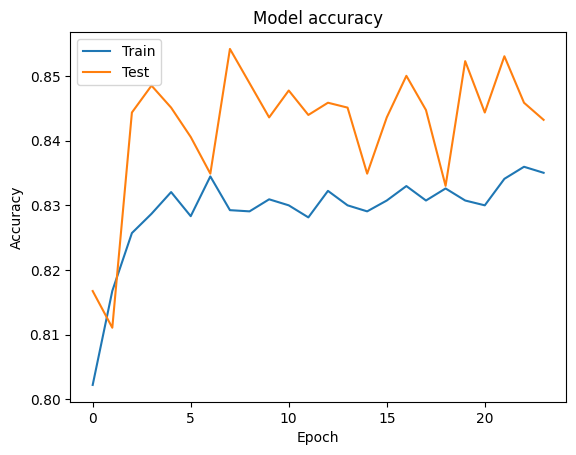

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


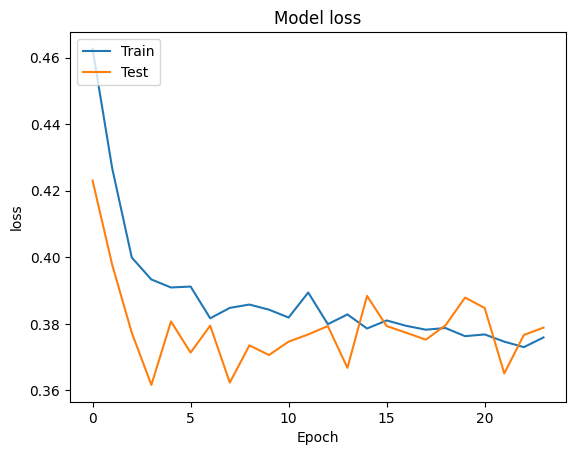

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [ ]:
y_pred=clf.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[1552,   43],
       [ 220,  185]])

In [ ]:
score=accuracy_score(y_pred,y_test)
score

0.8685

In [ ]:
clf.get_weights()

[array([[-0.06992652,  0.36416978, -0.0436439 , -0.26343462,  0.22075875,
          0.21661974,  0.4546551 ,  0.6391658 , -0.16205105,  0.08538483,
          0.13574503],
        [-0.37375608, -0.77062464,  0.9591811 , -1.9906541 , -0.3672596 ,
         -2.3365555 , -0.10232325, -0.5007562 ,  1.2892195 ,  1.9116234 ,
          0.5733742 ],
        [ 0.00822317,  0.6047057 ,  0.09095009, -0.6792366 ,  0.03791361,
         -0.03521911, -0.0916293 ,  0.24553928, -0.42510772,  0.2234248 ,
          0.09362345],
        [ 0.169002  , -1.1443977 , -1.9521937 ,  0.99815387, -0.974882  ,
         -0.12348074,  1.7697732 , -0.16766503,  2.413924  ,  0.23321983,
          0.42029592],
        [ 2.6107178 ,  1.1306144 , -3.0350664 ,  0.11655539,  1.152821  ,
          0.60832024,  0.2512517 ,  0.1077855 ,  1.1991613 ,  0.09714683,
          2.3712661 ],
        [ 0.02064974, -1.1342244 , -0.38531715, -0.49850923,  0.27444154,
         -0.5583991 , -0.05562216,  0.20926985, -0.49865142, -0.0217839

In [ ]:

clf.save('churnmodel.keras')


In [ ]:
from google.colab import files

# Download the model file
files.download('churnmodel.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
clf.save('churnmodel2.keras')

In [ ]:
from google.colab import files

# Download the model file
files.download('churnmodel2.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>